## Comparing different SVM kernels on a multi-class classification problem

In [1]:
from sklearn import svm, datasets
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset
from sklearn.datasets import load_wine
wine = load_wine()

print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [2]:
# Consider the 2 features
X = wine.data
Y = wine.target

# Number of unique targets
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [3]:
# List of features:
feature_names = wine.feature_names
print(feature_names)

print("\n")
print("Total number of features: {}".format(len(feature_names)))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Total number of features: 13


In [4]:
# Quick look at the data
X = pd.DataFrame(X, columns=feature_names)
X.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [5]:
fs = SelectKBest(chi2, k=4)
X_new = fs.fit_transform(X, Y)
selected_features = X.columns.values[fs.get_support()]
print("Feature Names :{}".format(selected_features))

X_new = pd.DataFrame(X_new[:, 0:2])
X_new.head()

Feature Names :['magnesium' 'flavanoids' 'color_intensity' 'proline']


,0,1
0,127.0,3.06
1,100.0,2.76
2,101.0,3.24
3,113.0,3.49
4,118.0,2.69


In [6]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.33, random_state=1)

In [19]:
# SVM Classifier with different kernels
C = 1.0 
models = (svm.SVC(kernel='linear', C=C, decision_function_shape='ovr', random_state=1),
          svm.SVC(kernel='rbf', gamma=0.35, C=C, decision_function_shape='ovr', random_state=1),
          svm.SVC(kernel='poly', degree=3, C=C, decision_function_shape='ovr', random_state=1),
          svm.SVC(kernel='sigmoid', gamma=2, decision_function_shape='ovr', random_state=1))

models = (clf.fit(X_train, y_train) for clf in models)

### Plotting functions

In [20]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [21]:
cols, rows = 2, 2
#plt.figure(figsize=(20, 40))
fig, sub = plt.subplots(rows, cols, figsize=(10, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial(degree 3) kernel', 
          'SVC with sigmoid kernel')

X0, X1 = X_train.iloc[:, 0], X_train.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.35, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)


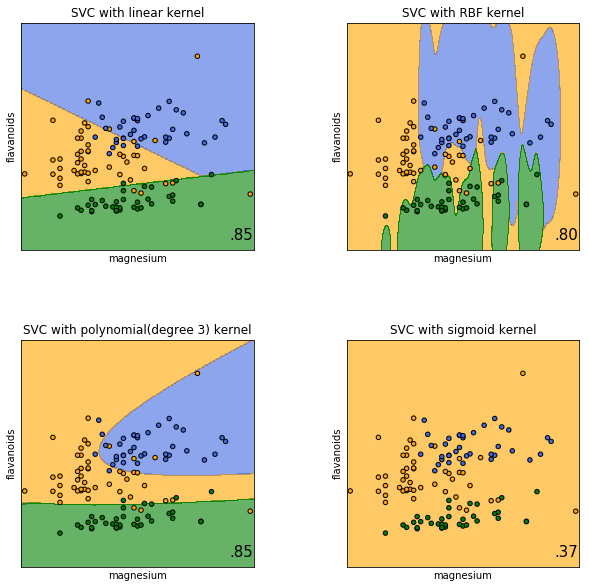

In [22]:

cm_bright = ListedColormap(['royalblue', 'orange', 'green'])
for clf, title, ax in zip(models, titles, sub.flatten()):
    score = f1_score(y_test, clf.predict(X_test), average='micro')
    print(clf)
    plot_contours(ax, clf, xx, yy,
                  cmap=cm_bright, alpha=0.6)
    ax.scatter(X0, X1, c=y_train, cmap=cm_bright, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(selected_features[0])
    ax.set_ylabel(selected_features[1])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), 
            size=15, horizontalalignment='right')
    ax.set_title(title)

plt.show()